### Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods

**I. Research Question**

For this project, I will be looking for a location in Toronto that is suitable to open a childcare center. As female labor force participation rate has been going up for the past decade, the need for childcare services have been on the climb as well. There are plenty of opportunities to open up a childcare center in Toronto -- a diverse financial center with a robust workforce. This project targets stakeholders who are interested in opening up a childcare center in Toronto and seek a perfect neighborhood to establish their businesses.

In order to search for an ideal location to open a childcare center, I propose to look for the following key indicators
* In a convenient neighborhood, with few competitors
* With large proportion of working households with children
* In a neighborhood with high income, high education, high occupancy rate 

**II. Data Description**

This project uses three sets of data

1. Postal Code data is extracted for Toronto from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M.
2. Foursquare API is used to get common venues for each neighborhood in Toronto.
3. Statistics Canada's 2016 Census data are used to extract postal-code level population and demographic data (Data was downloaded from: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/index.cfm?Lang=E)

In [1]:
import pandas as pd
import numpy as np
import requests
import re

!pip install beautifulsoup4
from urllib.request import urlopen
from bs4 import BeautifulSoup

     |████████████████████████████████| 122kB 9.4MB/s eta 0:00:01


In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html = urlopen(url)

soup = BeautifulSoup(html, 'html.parser')

In [3]:
rows = soup.find_all('tr')

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)

df = pd.DataFrame(list_rows)
df = df[0].str.split(',', 2, expand = True)
df.head(10)

,0,1,2
0,[],None,None
1,[M1A\n,Not assigned\n,Not assigned\n]
2,[M2A\n,Not assigned\n,Not assigned\n]
3,[M3A\n,North York\n,Parkwoods\n]
4,[M4A\n,North York\n,Victoria Village\n]
5,[M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n]"
6,[M6A\n,North York\n,"Lawrence Manor, Lawrence Heights\n]"
7,[M7A\n,Downtown Toronto\n,"Queen's Park, Ontario Provincial Government\n]"
8,[M8A\n,Not assigned\n,Not assigned\n]
9,[M9A\n,Etobicoke\n,"Islington Avenue, Humber Valley Village\n]"


In [4]:
df.tail(10)

,0,1,2
175,[M4Z\n,Not assigned\n,Not assigned\n]
176,[M5Z\n,Not assigned\n,Not assigned\n]
177,[M6Z\n,Not assigned\n,Not assigned\n]
178,[M7Z\n,Not assigned\n,Not assigned\n]
179,[M8Z\n,Etobicoke\n,"Mimico NW, The Queensway West, South of Bloor..."
180,[M9Z\n,Not assigned\n,Not assigned\n]
181,[\n,\n],None
182,[\n\n\nNL\n\nNS\n\nPE\n\nNB\n\nQC\n\nON\n\nMB\...,NL\n,"NS\n, PE\n, NB\n, QC\n, ON\n, MB\n, SK\n, AB\..."
183,[NL\n,NS\n,"PE\n, NB\n, QC\n, ON\n, MB\n, SK\n, AB\n, BC\..."
184,[A\n,B\n,"C\n, E\n, G\n, H\n, J\n, K\n, L\n, M\n, N\n, ..."


In [5]:
df = df.loc[1:180,:]
df.reset_index(drop = True)

df[0] = df[0].str.strip('[')
df[0] = df[0].str.strip(']')
df[0] = df[0].str.strip('\n')
df[1] = df[1].str.strip('\n')
df[1] = df[1].str.strip('')
df[2] = df[2].str.strip('\n]')
df[2] = df[2].str.strip('')

# remove leading and trailing spaces
df[0] = df[0].str.strip()
df[1] = df[1].str.strip()
df[2] = df[2].str.strip()

df.rename(columns={0:'Postal Code', 1:'Borough', 2:'Neighborhood'}, inplace = True)
df.head()

,Postal Code,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [6]:
df_final = df.loc[df['Borough'] != "Not assigned"]
df_final.reset_index(drop = True)
df_final.head()

,Postal Code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [7]:
coord = pd.read_csv('Geospatial_Coordinates.csv')
df_comb = df_final.join(coord.set_index('Postal Code'), on = 'Postal Code')
df_comb.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
3,M3A,North York,Parkwoods,43.753259,-79.329656
4,M4A,North York,Victoria Village,43.725882,-79.315572
5,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
6,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [8]:
ext_data = pd.read_csv('ext_data_process.csv')
ext_data.rename(columns={'pcode': 'Postal Code'}, inplace = True)
ext_data['Postal Code'] = ext_data['Postal Code'].str.strip()
ext_data.head(10)

,Postal Code,cfam_size,emp_rate,tot_hhldinc_med,population,tot_priv_dwl,workage_prop,singledetach_prop,apt_prop,cfam_wchild_prop,immi_prop,uniab_prop,workftfy_prop,work_usualplc_prop,commute60m_prop
0,M1B,3.2,56.0,69126,66108,20957,0.611935,3.267919,0.209590,0.520609,0.599105,0.254412,0.295118,0.843617,0.275528
1,M1C,3.1,58.8,109785,35626,11588,0.606456,3.161047,0.014197,0.541506,0.448852,0.404743,0.351572,0.826874,0.260165
2,M1E,3.0,52.7,62047,46943,17637,0.595548,2.735431,0.344697,0.442604,0.477930,0.281898,0.270305,0.813225,0.282285
3,M1G,3.2,49.3,54450,29690,10116,0.588919,3.040451,0.413210,0.498419,0.560155,0.278678,0.234486,0.826362,0.259929
4,M1H,2.9,55.0,58492,24383,9274,0.632561,2.713968,0.573178,0.467262,0.579668,0.347083,0.292399,0.845635,0.239944
5,M1J,3.1,52.6,54507,36699,12797,0.597411,2.989817,0.564562,0.477064,0.568508,0.255145,0.256190,0.829356,0.277006
6,M1K,3.0,54.4,53260,48434,18620,0.623516,2.701338,0.453709,0.463026,0.554128,0.265969,0.277882,0.833754,0.219948
7,M1L,3.1,56.7,56779,35081,12884,0.627476,2.823742,0.346881,0.523991,0.521892,0.361104,0.288636,0.819662,0.190141
8,M1M,3.0,55.6,68550,22913,8908,0.601048,2.657772,0.311485,0.489567,0.403940,0.341454,0.311794,0.805005,0.229156
9,M1N,2.9,59.6,73256,22136,9535,0.622855,2.434304,0.103903,0.451827,0.284487,0.338976,0.347241,0.811982,0.188370


In [9]:
# combine toronto postal-neighborhood data with external StatsCan data (pre-processed)
df_proc = df_comb.merge(ext_data, on='Postal Code', how='left')
df_proc.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,cfam_size,emp_rate,tot_hhldinc_med,population,tot_priv_dwl,workage_prop,singledetach_prop,apt_prop,cfam_wchild_prop,immi_prop,uniab_prop,workftfy_prop,work_usualplc_prop,commute60m_prop
0,M3A,North York,Parkwoods,43.753259,-79.329656,3.0,57.5,64761.0,34615.0,13847.0,0.615340,2.613439,0.506606,0.461218,0.496812,0.410005,0.309756,0.803214,0.205002
1,M4A,North York,Victoria Village,43.725882,-79.315572,2.9,54.1,54905.0,14443.0,6299.0,0.597439,2.341167,0.347650,0.414062,0.516408,0.347541,0.315121,0.838028,0.212272
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.6,64.4,52623.0,41078.0,24186.0,0.764606,1.839266,0.723976,0.251294,0.378371,0.517506,0.367251,0.815626,0.090066
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.1,57.4,53933.0,21048.0,8751.0,0.570444,2.606192,0.334985,0.399402,0.497793,0.369856,0.264238,0.822839,0.144707
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_proc.describe(include = 'all')

,Postal Code,Borough,Neighborhood,Latitude,Longitude,cfam_size,emp_rate,tot_hhldinc_med,population,tot_priv_dwl,workage_prop,singledetach_prop,apt_prop,cfam_wchild_prop,immi_prop,uniab_prop,workftfy_prop,work_usualplc_prop,commute60m_prop
count,103,103,103,103.000000,103.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
unique,103,10,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M4G,North York,Downsview,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,24,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,43.704608,-79.397153,2.875000,60.000000,71346.822917,28459.312500,12284.187500,0.648171,2.473797,0.426547,0.426164,0.446150,0.465058,0.333854,0.803587,0.152720
std,NaN,NaN,NaN,0.052463,0.097146,0.241922,7.092012,19833.839830,14007.981457,6171.844265,0.075253,0.459515,0.251209,0.094336,0.129936,0.180880,0.066461,0.024672,0.064819
min,NaN,NaN,NaN,43.602414,-79.615819,2.300000,46.400000,40291.000000,2005.000000,1718.000000,0.549657,1.549453,0.000000,0.160000,0.198828,0.111006,0.197018,0.737646,0.042969
25%,NaN,NaN,NaN,43.660567,-79.464763,2.800000,55.000000,57151.000000,18531.250000,8175.500000,0.600810,2.175181,0.249711,0.396162,0.333759,0.324293,0.287050,0.786945,0.090893
50%,NaN,NaN,NaN,43.696948,-79.388790,2.900000,58.700000,65508.000000,25724.000000,11215.500000,0.626724,2.494556,0.388622,0.447650,0.443735,0.461745,0.322986,0.803687,0.144288
75%,NaN,NaN,NaN,43.745320,-79.340923,3.000000,64.925000,79188.500000,37820.500000,15744.000000,0.671057,2.722973,0.565700,0.480081,0.556260,0.633168,0.370895,0.819807,0.210302


In [11]:
# remove NaNs
df_proc.dropna(inplace = True)
df_proc.describe(include = 'all')

,Postal Code,Borough,Neighborhood,Latitude,Longitude,cfam_size,emp_rate,tot_hhldinc_med,population,tot_priv_dwl,workage_prop,singledetach_prop,apt_prop,cfam_wchild_prop,immi_prop,uniab_prop,workftfy_prop,work_usualplc_prop,commute60m_prop
count,96,96,96,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
unique,96,9,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M1W,North York,Downsview,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,24,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,43.708566,-79.396472,2.875000,60.000000,71346.822917,28459.312500,12284.187500,0.648171,2.473797,0.426547,0.426164,0.446150,0.465058,0.333854,0.803587,0.152720
std,NaN,NaN,NaN,0.052123,0.097749,0.241922,7.092012,19833.839830,14007.981457,6171.844265,0.075253,0.459515,0.251209,0.094336,0.129936,0.180880,0.066461,0.024672,0.064819
min,NaN,NaN,NaN,43.602414,-79.594054,2.300000,46.400000,40291.000000,2005.000000,1718.000000,0.549657,1.549453,0.000000,0.160000,0.198828,0.111006,0.197018,0.737646,0.042969
25%,NaN,NaN,NaN,43.667357,-79.464763,2.800000,55.000000,57151.000000,18531.250000,8175.500000,0.600810,2.175181,0.249711,0.396162,0.333759,0.324293,0.287050,0.786945,0.090893
50%,NaN,NaN,NaN,43.706573,-79.392309,2.900000,58.700000,65508.000000,25724.000000,11215.500000,0.626724,2.494556,0.388622,0.447650,0.443735,0.461745,0.322986,0.803687,0.144288
75%,NaN,NaN,NaN,43.750743,-79.340219,3.000000,64.925000,79188.500000,37820.500000,15744.000000,0.671057,2.722973,0.565700,0.480081,0.556260,0.633168,0.370895,0.819807,0.210302


In [12]:
df_proc.reset_index(drop = True, inplace = True)
df_proc

,Postal Code,Borough,Neighborhood,Latitude,Longitude,cfam_size,emp_rate,tot_hhldinc_med,population,tot_priv_dwl,workage_prop,singledetach_prop,apt_prop,cfam_wchild_prop,immi_prop,uniab_prop,workftfy_prop,work_usualplc_prop,commute60m_prop
0,M3A,North York,Parkwoods,43.753259,-79.329656,3.0,57.5,64761.0,34615.0,13847.0,0.615340,2.613439,0.506606,0.461218,0.496812,0.410005,0.309756,0.803214,0.205002
1,M4A,North York,Victoria Village,43.725882,-79.315572,2.9,54.1,54905.0,14443.0,6299.0,0.597439,2.341167,0.347650,0.414062,0.516408,0.347541,0.315121,0.838028,0.212272
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.6,64.4,52623.0,41078.0,24186.0,0.764606,1.839266,0.723976,0.251294,0.378371,0.517506,0.367251,0.815626,0.090066
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.1,57.4,53933.0,21048.0,8751.0,0.570444,2.606192,0.334985,0.399402,0.497793,0.369856,0.264238,0.822839,0.144707
4,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,2.9,60.7,75907.0,35594.0,15730.0,0.621014,2.354167,0.559855,0.430025,0.413521,0.509012,0.351131,0.792933,0.151240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,2.8,58.8,40291.0,20822.0,10809.0,0.706772,2.020378,0.812227,0.373494,0.499630,0.453912,0.291584,0.843931,0.130879
92,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,2.9,57.6,119097.0,10787.0,4680.0,0.559110,2.383425,0.390055,0.451718,0.255088,0.694064,0.332224,0.767084,0.098398
93,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,2.3,66.2,52167.0,30472.0,21975.0,0.821792,1.549453,0.888126,0.180051,0.356915,0.653809,0.385411,0.839873,0.086268
94,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,2.8,66.9,73673.0,21299.0,10485.0,0.673944,2.176801,0.283597,0.437177,0.355210,0.466488,0.403258,0.777498,0.134660


The original toronto dataset has 103 valid neighborhoods, but only 96 has population and demographic data (based on 2016 Census). 

Here is a dictionary of the added variables:

* cfam_size: Average size of census family
* emp_rate: Employment rate
* tot_hhldinc_med: Median total household income (before tax)
* population: Population size
* tot_priv_dwl: Total private dwellings
* workage_prop: Proportion of individuals in working age (20-64)
* singledetach_prop: Proportion of single-detached houses
* apt_prop: Proportion of apartments
* cfam_wchild_prop: Proportion of census families with child
* immi_prop: Proportion of immigrants 
* uniab_prop: Proportion of individuals with college/university degree or above
* workftfy_prop: Proportion of individuals
* work_usualplc_prop: Proportion of individuals go to work at usual place (instead of working from home)
* commute60m_prop: Proportion of individuals commuting 60 minutes or above to go to work

I will use this data along with most common vennues data (extract from foursquare API) to determine which neighborhood is best for opening a childcare center.

**III. Methodology**

This section discusses and describes exploratory data analysis, inferential statistical testing, and machine learnings.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First I look at correlation of the population and demographic data

In [14]:
df_proc.iloc[:,5:].corr()

,cfam_size,emp_rate,tot_hhldinc_med,population,tot_priv_dwl,workage_prop,singledetach_prop,apt_prop,cfam_wchild_prop,immi_prop,uniab_prop,workftfy_prop,work_usualplc_prop,commute60m_prop
cfam_size,1.000000,-0.668005,0.092273,0.179091,-0.175005,-0.856376,0.870159,-0.542505,0.924553,0.391536,-0.547728,-0.676655,-0.159081,0.566105
emp_rate,-0.668005,1.000000,0.321136,-0.234011,0.086159,0.743430,-0.717419,0.219312,-0.575756,-0.725852,0.621494,0.962939,0.075753,-0.726748
tot_hhldinc_med,0.092273,0.321136,1.000000,-0.344901,-0.336473,-0.156428,-0.012632,-0.310555,0.246962,-0.519676,0.536159,0.382414,-0.256737,-0.446606
population,0.179091,-0.234011,-0.344901,1.000000,0.884536,-0.094911,0.271628,-0.053421,0.176462,0.374186,-0.360563,-0.249529,0.065548,0.441830
tot_priv_dwl,-0.175005,0.086159,-0.336473,0.884536,1.000000,0.234277,-0.126437,0.160363,-0.165333,0.110108,-0.084935,0.048973,0.050078,0.132570
workage_prop,-0.856376,0.743430,-0.156428,-0.094911,0.234277,1.000000,-0.737183,0.572466,-0.832878,-0.311463,0.464357,0.710261,0.311946,-0.509286
singledetach_prop,0.870159,-0.717419,-0.012632,0.271628,-0.126437,-0.737183,1.000000,-0.565704,0.823877,0.629790,-0.694478,-0.702460,0.008378,0.738786
apt_prop,-0.542505,0.219312,-0.310555,-0.053421,0.160363,0.572466,-0.565704,1.000000,-0.652188,0.076353,0.380024,0.242971,0.339030,-0.256788
cfam_wchild_prop,0.924553,-0.575756,0.246962,0.176462,-0.165333,-0.832878,0.823877,-0.652188,1.000000,0.309613,-0.394321,-0.565466,-0.244809,0.481948
immi_prop,0.391536,-0.725852,-0.519676,0.374186,0.110108,-0.311463,0.629790,0.076353,0.309613,1.000000,-0.622798,-0.689649,0.207535,0.767795


There are a few highlights worth mentioning from this correlation table (note that I haven't perform tests to see if these correlations are significant. 
* Neighborhoods with large census family size tend to have lower proportion of working age population, have lower employment rate, and higher proportion of people living in large houses; -- these features seem to define wealthy retirement zones 
* Neighborhoods with higher employment rates, not surprisingly, have larger proportion of working age individuals, with above university degree; -- These features are what we want to target when we look for a location open a childcare center.
* Neighborhoods with higher proportion of working age individuals tend to have lower percentage of census family with children; -- Given this negative relationship, it is important for us to look for locations where there is a good balance of working age population and households with children.
* Neighborhoods with high proportion of immigrants tend to have more people travelling long distance to go to work; -- this is something we should take into account given that these immigrant parents would need childcare services more because their work+commute hours will be longer than usual.

In [15]:
from scipy import stats
stats.pearsonr(df_proc['uniab_prop'], df_proc['tot_hhldinc_med'])

(0.5361594397869481, 1.8037739484013514e-08)

So for example, we can see there's high correlation between proportion of individuals with university degree and above and median total household income for that neighborhood and it is very significant (p-value <0.001).

Let's first visualize these neighborhoods, centering on downtown Toronto.

In [16]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.5               |   py36h830a2c2_0        10.1 MB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-

In [17]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [18]:
address = 'Downtown Toronto, Ontario'

geolocator = Nominatim(user_agent = "to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Downtown Toronto are 43.6563221, -79.3809161.


In [19]:
map_to = folium.Map(location = [latitude, longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip(df_proc['Latitude'], df_proc['Longitude'], df_proc['Borough'], df_proc['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_to)
    
map_to

Use Foursquare API to explore neighborhoods.

In [20]:
CLIENT_ID = 'NPNPYL0S0J00IYGHOSAMCX3UW3SMWOG2DONCSGOKZS0BTTW3' # your Foursquare ID
CLIENT_SECRET = 'Q2HFGRZRIXSX0VOKWIAIJWOA25FSCGI1JXUYCN3KDAJUHNPY' # your Foursquare Secret
VERSION = '20200703'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NPNPYL0S0J00IYGHOSAMCX3UW3SMWOG2DONCSGOKZS0BTTW3
CLIENT_SECRET:Q2HFGRZRIXSX0VOKWIAIJWOA25FSCGI1JXUYCN3KDAJUHNPY


In [21]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT = 1000, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                    'Neighborhood Latitude',
                    'Neighborhood Longitude',
                    'Venue',
                    'Venue Latitude',
                    'Venue Longitude',
                    'Venue Category']
    
    return(nearby_venues)

In [22]:
toronto_venues = getNearbyVenues(names = df_proc['Neighborhood'],
                                 latitudes = df_proc['Latitude'],
                                 longitudes = df_proc['Longitude']
                                )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview
The Danfo

In [23]:
print(toronto_venues.shape)
toronto_venues.head()

(1670, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [60]:
pd.set_option('display.max_rows', None)
df_temp = toronto_venues.groupby('Venue Category').nunique()
df_temp[['Neighborhood']].sort_values(['Neighborhood'], ascending = False).head(10)

,Neighborhood
Venue Category,
Coffee Shop,40
Park,35
Pizza Place,32
Café,30
Restaurant,28
Sandwich Place,24
Bakery,22
Bar,20
Bank,20


In [25]:
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 252 unique categories.


Upon further investigation of venues in Toronto, I do not find "childcare centers". However, it will be a good idea to find a location where these following venues are nearby: **Baby Store, Field, Fountain, Ice Cream Shop, Kids Store, Playground, Pool, Swim School, Toy / Game Store, Park**. Because these venues are not very common in our neighborhoods, if we are to cluster these neighborhoods based on the most common venues, we may not take them into account. I created a flag indicating whether these venues exists in the neighborhood to perform clustering.  

In [26]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix = "", prefix_sep = "")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

# generate a target flag to indicate that the neighborhood has the above-mentioned venues
toronto_grouped['target'] = (toronto_grouped['Baby Store'] >0).astype(int) | (toronto_grouped['Field'] >0).astype(int) | \
                            (toronto_grouped['Fountain'] >0).astype(int) | (toronto_grouped['Ice Cream Shop'] >0).astype(int) | \
                            (toronto_grouped['Kids Store'] >0).astype(int) | (toronto_grouped['Playground'] >0).astype(int) | \
                            (toronto_grouped['Pool'] >0).astype(int) | (toronto_grouped['Swim School'] >0).astype(int) | \
                            (toronto_grouped['Toy / Game Store'] >0).astype(int) | (toronto_grouped['Park'] >0).astype(int) 

toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,target
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0
1,"Alderwood, Long Branch",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1
3,Bayview Village,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1
5,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017544,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1
6,"Birch Cliff, Cliffside West",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0
7,"Brockton, Parkdale Village, Exhibition Place",0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0
8,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0
9,Caledonia-Fairbanks,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.250000,1


Print top 5 most common venues from each neighborhood.

In [27]:
num_top_venues = 5

for i in toronto_grouped['Neighborhood']:
    print("----"+i+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == i].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:-1]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.25
1  Latin American Restaurant  0.25
2             Breakfast Spot  0.25
3               Skating Rink  0.25
4         Mac & Cheese Joint  0.00


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.22
1           Gym  0.11
2  Skating Rink  0.11
3   Coffee Shop  0.11
4           Pub  0.11


----Bathurst Manor, Wilson Heights, Downsview North----
           venue  freq
0    Coffee Shop  0.11
1           Bank  0.11
2     Restaurant  0.05
3  Deli / Bodega  0.05
4  Shopping Mall  0.05


----Bayview Village----
                 venue  freq
0                 Bank  0.25
1  Japanese Restaurant  0.25
2   Chinese Restaurant  0.25
3                 Café  0.25
4          Yoga Studio  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.08
1      Sandwich Place  0.08
2     Thai Restaurant  0.08
3         Coffee Shop  0.08
4          Restaurant  0.08

Create dataframe to include the top 10 most common venues for each neighborhood.

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood','target']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except: 
        columns.append('{}th Most Common Venue'.format(ind+1))
        
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted[['Neighborhood','target']] = toronto_grouped[['Neighborhood','target']]

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(toronto_grouped.iloc[ind, 0:-1], num_top_venues)
    
neighborhoods_venues_sorted.head()

,Neighborhood,target,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,0,Latin American Restaurant,Lounge,Skating Rink,Breakfast Spot,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
1,"Alderwood, Long Branch",0,Pizza Place,Gym,Skating Rink,Pharmacy,Pub,Dance Studio,Sandwich Place,Coffee Shop,Gastropub,Cosmetics Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",1,Coffee Shop,Bank,Ice Cream Shop,Mobile Phone Shop,Diner,Bridal Shop,Sandwich Place,Deli / Bodega,Restaurant,Supermarket
3,Bayview Village,0,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Department Store
4,"Bedford Park, Lawrence Manor East",1,Coffee Shop,Sandwich Place,Restaurant,Italian Restaurant,Thai Restaurant,Juice Bar,Pizza Place,Butcher,Pub,Café


Merge population and demographic data in the table before clustering.

In [30]:
df_toronto = df_proc.join(toronto_grouped.set_index('Neighborhood'), on = 'Neighborhood')
df_toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,cfam_size,emp_rate,tot_hhldinc_med,population,tot_priv_dwl,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,target
0,M3A,North York,Parkwoods,43.753259,-79.329656,3.0,57.5,64761.0,34615.0,13847.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,2.9,54.1,54905.0,14443.0,6299.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.6,64.4,52623.0,41078.0,24186.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.022222,0.0,0.0,1.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.1,57.4,53933.0,21048.0,8751.0,...,0.0,0.0,0.0,0.076923,0.0,0.0,0.000000,0.0,0.0,0.0
4,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,2.9,60.7,75907.0,35594.0,15730.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_toronto.dropna(inplace = True)
df_toronto.reset_index(drop = True, inplace = True)
df_toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,cfam_size,emp_rate,tot_hhldinc_med,population,tot_priv_dwl,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,target
0,M3A,North York,Parkwoods,43.753259,-79.329656,3.0,57.5,64761.0,34615.0,13847.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,2.9,54.1,54905.0,14443.0,6299.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.6,64.4,52623.0,41078.0,24186.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.022222,0.0,0.0,1.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.1,57.4,53933.0,21048.0,8751.0,...,0.0,0.0,0.0,0.076923,0.0,0.0,0.000000,0.0,0.0,0.0
4,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,3.2,56.0,69126.0,66108.0,20957.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


Perform K-means clustering

In [32]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

!pip install yellowbrick
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

     |████████████████████████████████| 266kB 3.5MB/s eta 0:00:01


First use elbow method to determine optimal number of clusters.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


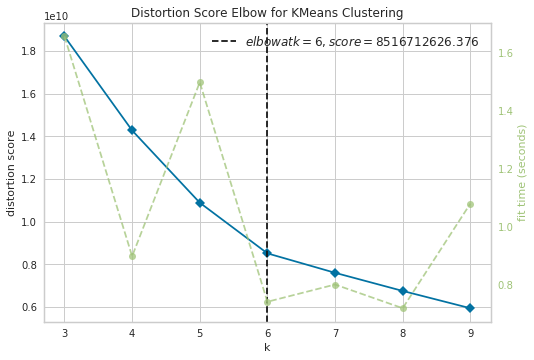

In [33]:
toronto_grouped_clustering = df_toronto.iloc[:, 5:]

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,10))

visualizer.fit(toronto_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [34]:
# Based on the above evaluation, I will use 6 clusters
kcluster = 6

kmeans = KMeans(n_clusters = kcluster, random_state = 0).fit(toronto_grouped_clustering)
kmeans.labels_[0:50]

array([4, 0, 4, 0, 5, 2, 0, 0, 3, 3, 1, 4, 4, 2, 3, 3, 4, 2, 2, 4, 0, 1,
       0, 3, 0, 3, 3, 0, 2, 4, 4, 5, 0, 3, 2, 3, 4, 3, 0, 3, 4, 4, 0, 3,
       0, 0, 3, 0, 3, 1], dtype=int32)

### Visualize these clusters

In [35]:
df_toronto.insert(0,'Cluster Labels', kmeans.labels_)

In [36]:
df_toronto.head()

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude,Longitude,cfam_size,emp_rate,tot_hhldinc_med,population,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,target
0,4,M3A,North York,Parkwoods,43.753259,-79.329656,3.0,57.5,64761.0,34615.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0
1,0,M4A,North York,Victoria Village,43.725882,-79.315572,2.9,54.1,54905.0,14443.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.6,64.4,52623.0,41078.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.022222,0.0,0.0,1.0
3,0,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.1,57.4,53933.0,21048.0,...,0.0,0.0,0.0,0.076923,0.0,0.0,0.000000,0.0,0.0,0.0
4,5,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,3.2,56.0,69126.0,66108.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [37]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kcluster)
ys = [i + x + (i*x)**2 for i in range(kcluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
    
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighborhood'], df_toronto['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
                                                                                 
map_clusters

**IV. Results**



Now I can examine these clusters to determine which location is ideal for opening a childcare center.

In [39]:
toronto_merged = df_toronto.iloc[:, 0:20].join(neighborhoods_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')
toronto_merged.head()

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude,Longitude,cfam_size,emp_rate,tot_hhldinc_med,population,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,M3A,North York,Parkwoods,43.753259,-79.329656,3.0,57.5,64761.0,34615.0,...,Park,Food & Drink Shop,Women's Store,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
1,0,M4A,North York,Victoria Village,43.725882,-79.315572,2.9,54.1,54905.0,14443.0,...,Coffee Shop,Pizza Place,Hockey Arena,Portuguese Restaurant,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Distribution Center
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.6,64.4,52623.0,41078.0,...,Coffee Shop,Park,Bakery,Breakfast Spot,Pub,Café,Theater,Cosmetics Shop,Shoe Store,Restaurant
3,0,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.1,57.4,53933.0,21048.0,...,Clothing Store,Furniture / Home Store,Coffee Shop,Event Space,Shoe Store,Miscellaneous Shop,Boutique,Accessories Store,Vietnamese Restaurant,Gift Shop
4,5,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,3.2,56.0,69126.0,66108.0,...,Fast Food Restaurant,Print Shop,Women's Store,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


First look at population and demographic characteristics of these clusters

In [40]:
toronto_merged.groupby('Cluster Labels').mean()

,Latitude,Longitude,cfam_size,emp_rate,tot_hhldinc_med,population,tot_priv_dwl,workage_prop,singledetach_prop,apt_prop,cfam_wchild_prop,immi_prop,uniab_prop,workftfy_prop,work_usualplc_prop,commute60m_prop,target
Cluster Labels,,,,,,,,,,,,,,,,,
0,43.714335,-79.414073,2.895000,56.120000,54300.000000,18791.350000,8191.950000,0.648753,2.502215,0.498429,0.407253,0.504939,0.374381,0.293038,0.813754,0.173620,0.550000
1,43.721710,-79.367886,3.080000,60.160000,123891.000000,21358.800000,8139.400000,0.579183,2.650236,0.190031,0.526238,0.288544,0.645841,0.349119,0.795514,0.110567,0.600000
2,43.683649,-79.391141,2.728571,66.500000,93191.142857,13040.000000,6603.142857,0.679507,2.107236,0.533338,0.379240,0.336013,0.679465,0.400374,0.801519,0.080132,0.714286
3,43.685240,-79.418172,2.845455,63.186364,74004.681818,27892.863636,12424.090909,0.645520,2.383561,0.306136,0.435293,0.371659,0.499573,0.363537,0.793955,0.131840,0.500000
4,43.715651,-79.381072,2.892000,57.384000,58620.400000,39936.400000,16942.480000,0.644363,2.547612,0.457159,0.422209,0.509341,0.355359,0.306817,0.803690,0.190575,0.400000
5,43.756490,-79.369473,2.900000,58.566667,66267.333333,60022.000000,24783.500000,0.676382,2.751448,0.518768,0.439092,0.580566,0.437634,0.323194,0.821361,0.187941,0.500000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


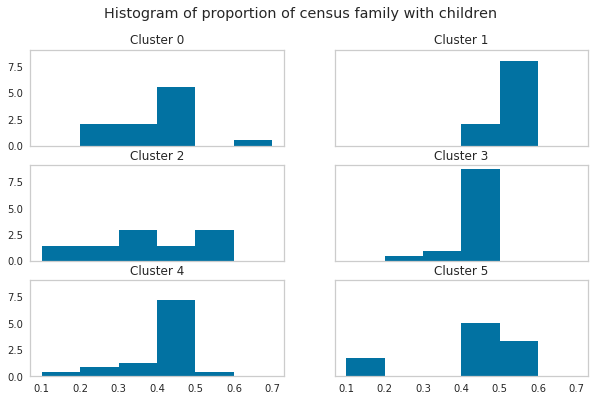

In [41]:
plt.rcParams["axes.grid"] = False

fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (10,6), sharey = True, sharex = True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

bins = np.linspace(0.1,0.7, num = 7)
ax0.hist(toronto_merged[toronto_merged['Cluster Labels'] == 0]['cfam_wchild_prop'], bins, density = True, histtype = 'bar')
ax0.set_title('Cluster 0')
ax1.hist(toronto_merged[toronto_merged['Cluster Labels'] == 1]['cfam_wchild_prop'], bins, density = True, histtype = 'bar')
ax1.set_title('Cluster 1')
ax2.hist(toronto_merged[toronto_merged['Cluster Labels'] == 2]['cfam_wchild_prop'], bins, density = True, histtype = 'bar')
ax2.set_title('Cluster 2')
ax3.hist(toronto_merged[toronto_merged['Cluster Labels'] == 3]['cfam_wchild_prop'], bins, density = True, histtype = 'bar')
ax3.set_title('Cluster 3')
ax4.hist(toronto_merged[toronto_merged['Cluster Labels'] == 4]['cfam_wchild_prop'], bins, density = True, histtype = 'bar')
ax4.set_title('Cluster 4')
ax5.hist(toronto_merged[toronto_merged['Cluster Labels'] == 5]['cfam_wchild_prop'], bins, density = True, histtype = 'bar')
ax5.set_title('Cluster 5')

fig.suptitle('Histogram of proportion of census family with children')

plt.show()

Cluster 1 seems to have the highest proportion of census family with children. Other than that, cluster 3, 4 and 5 are reasonable second options. 

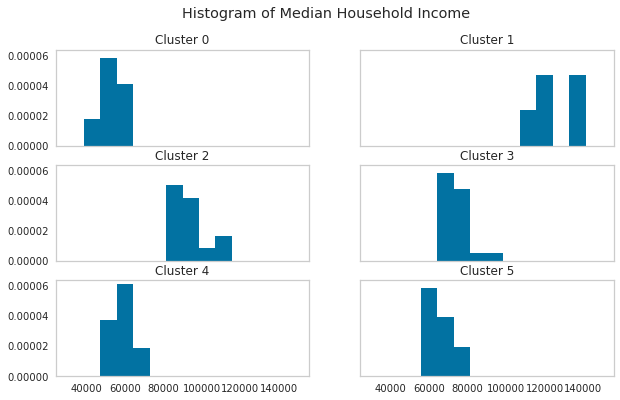

In [42]:
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (10,6), sharey = True, sharex = True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

bins = np.linspace(30000,150000, num = 15)
ax0.hist(toronto_merged[toronto_merged['Cluster Labels'] == 0]['tot_hhldinc_med'], bins, density = True, histtype = 'bar')
ax0.set_title('Cluster 0')
ax1.hist(toronto_merged[toronto_merged['Cluster Labels'] == 1]['tot_hhldinc_med'], bins, density = True, histtype = 'bar')
ax1.set_title('Cluster 1')
ax2.hist(toronto_merged[toronto_merged['Cluster Labels'] == 2]['tot_hhldinc_med'], bins, density = True, histtype = 'bar')
ax2.set_title('Cluster 2')
ax3.hist(toronto_merged[toronto_merged['Cluster Labels'] == 3]['tot_hhldinc_med'], bins, density = True, histtype = 'bar')
ax3.set_title('Cluster 3')
ax4.hist(toronto_merged[toronto_merged['Cluster Labels'] == 4]['tot_hhldinc_med'], bins, density = True, histtype = 'bar')
ax4.set_title('Cluster 4')
ax5.hist(toronto_merged[toronto_merged['Cluster Labels'] == 5]['tot_hhldinc_med'], bins, density = True, histtype = 'bar')
ax5.set_title('Cluster 5')

fig.suptitle('Histogram of Median Household Income')

plt.show()

Cluster 1 tends to be wealthier than the rest of the neighborhoods. Cluster 2 and 3 are in relatively good economic conditions too.

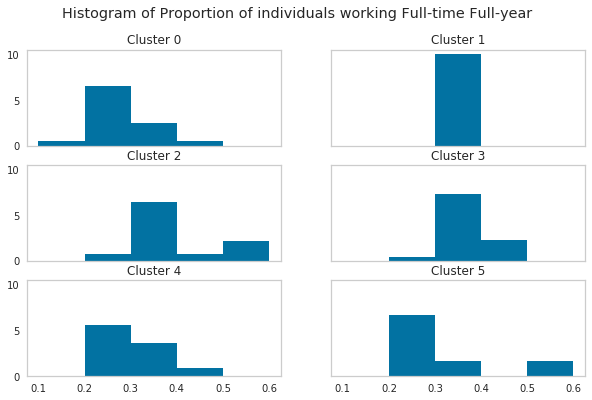

In [43]:
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (10,6), sharey = True, sharex = True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

bins = np.linspace(0.1,0.6, num = 6)
ax0.hist(toronto_merged[toronto_merged['Cluster Labels'] == 0]['workftfy_prop'], bins, density = True, histtype = 'bar')
ax0.set_title('Cluster 0')
ax1.hist(toronto_merged[toronto_merged['Cluster Labels'] == 1]['workftfy_prop'], bins, density = True, histtype = 'bar')
ax1.set_title('Cluster 1')
ax2.hist(toronto_merged[toronto_merged['Cluster Labels'] == 2]['workftfy_prop'], bins, density = True, histtype = 'bar')
ax2.set_title('Cluster 2')
ax3.hist(toronto_merged[toronto_merged['Cluster Labels'] == 3]['workftfy_prop'], bins, density = True, histtype = 'bar')
ax3.set_title('Cluster 3')
ax4.hist(toronto_merged[toronto_merged['Cluster Labels'] == 4]['workftfy_prop'], bins, density = True, histtype = 'bar')
ax4.set_title('Cluster 4')
ax5.hist(toronto_merged[toronto_merged['Cluster Labels'] == 5]['workftfy_prop'], bins, density = True, histtype = 'bar')
ax5.set_title('Cluster 5')

fig.suptitle('Histogram of Proportion of individuals working Full-time Full-year')

plt.show()

Cluster 2 and 3 have relatively larger proportion of people working full-time full-year. Cluster 1 and 5 have decent size of full-time work force as well. Interestingly, neighborhoods in cluster 1 is much more concentrated in terms of proportion of individuals working full-time full-year comparing to rest of the clusters.

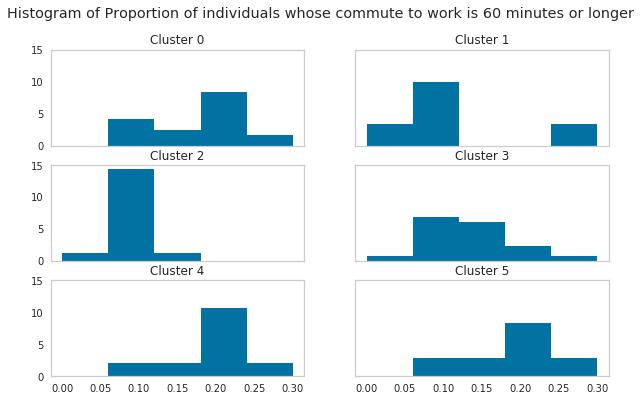

In [44]:
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (10,6), sharey = True, sharex = True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

bins = np.linspace(0,0.3, num = 6)
ax0.hist(toronto_merged[toronto_merged['Cluster Labels'] == 0]['commute60m_prop'], bins, density = True, histtype = 'bar')
ax0.set_title('Cluster 0')
ax1.hist(toronto_merged[toronto_merged['Cluster Labels'] == 1]['commute60m_prop'], bins, density = True, histtype = 'bar')
ax1.set_title('Cluster 1')
ax2.hist(toronto_merged[toronto_merged['Cluster Labels'] == 2]['commute60m_prop'], bins, density = True, histtype = 'bar')
ax2.set_title('Cluster 2')
ax3.hist(toronto_merged[toronto_merged['Cluster Labels'] == 3]['commute60m_prop'], bins, density = True, histtype = 'bar')
ax3.set_title('Cluster 3')
ax4.hist(toronto_merged[toronto_merged['Cluster Labels'] == 4]['commute60m_prop'], bins, density = True, histtype = 'bar')
ax4.set_title('Cluster 4')
ax5.hist(toronto_merged[toronto_merged['Cluster Labels'] == 5]['commute60m_prop'], bins, density = True, histtype = 'bar')
ax5.set_title('Cluster 5')

fig.suptitle('Histogram of Proportion of individuals whose commute to work is 60 minutes or longer')

plt.show()

People from cluster 4 and 5 tends to have longer commute to work. Cluster 3 have a wide variation of commuting length as well. 

So far, based on the analysis on population variables, cluster 3 fits most of our selection criteria. It has decent population size, relatively large number of census family with children. Large proportion of working households with decent household income. Let's examine venues near these clusters to see if they are in convenient locations.

In [45]:
pd.set_option('display.max_columns', None)
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[3] + list(range(20,toronto_merged.shape[1]))]]

,Neighborhood,target,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,0,Coffee Shop,Pizza Place,Hockey Arena,Portuguese Restaurant,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Distribution Center
3,"Lawrence Manor, Lawrence Heights",0,Clothing Store,Furniture / Home Store,Coffee Shop,Event Space,Shoe Store,Miscellaneous Shop,Boutique,Accessories Store,Vietnamese Restaurant,Gift Shop
6,"Parkview Hill, Woodbine Gardens",0,Pizza Place,Pet Store,Gastropub,Intersection,Athletics & Sports,Bank,Fast Food Restaurant,Gym / Fitness Center,Pharmacy,Café
7,"Garden District, Ryerson",1,Clothing Store,Coffee Shop,Bubble Tea Shop,Café,Japanese Restaurant,Hotel,Cosmetics Shop,Lingerie Store,Theater,Ramen Restaurant
20,Woburn,0,Coffee Shop,Convenience Store,Insurance Office,Korean Restaurant,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store
22,Central Bay Street,1,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Japanese Restaurant,Salad Place,Bubble Tea Shop,Burger Joint,Bar,Thai Restaurant
24,Cedarbrae,0,Bank,Lounge,Fried Chicken Joint,Hakka Restaurant,Athletics & Sports,Thai Restaurant,Caribbean Restaurant,Bakery,Gas Station,Dessert Shop
27,Thorncliffe Park,1,Indian Restaurant,Sandwich Place,Gym,Supermarket,Bank,Burger Joint,Coffee Shop,Discount Store,Fast Food Restaurant,Gas Station
32,"Northwood Park, York University",0,Coffee Shop,Furniture / Home Store,Bar,Massage Studio,Caribbean Restaurant,Women's Store,Discount Store,Dessert Shop,Dim Sum Restaurant,Diner
38,Downsview,1,Grocery Store,Park,Hotel,Shopping Mall,Discount Store,Business Service,Baseball Field,Food Truck,Bank,Liquor Store


In [46]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[3] + list(range(20,toronto_merged.shape[1]))]]

,Neighborhood,target,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,"Rouge Hill, Port Union, Highland Creek",0,Golf Course,Bar,Women's Store,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
21,Leaside,0,Coffee Shop,Bank,Sporting Goods Shop,Burger Joint,Furniture / Home Store,Sandwich Place,Supermarket,Sports Bar,Beer Store,Electronics Store
49,"Bedford Park, Lawrence Manor East",1,Coffee Shop,Sandwich Place,Restaurant,Italian Restaurant,Thai Restaurant,Juice Bar,Pizza Place,Butcher,Pub,Café
55,Lawrence Park,1,Park,Swim School,Bus Line,Women's Store,Dance Studio,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
88,"The Kingsway, Montgomery Road, Old Mill North",1,Park,River,Women's Store,Curling Ice,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


In [47]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[3] + list(range(20,toronto_merged.shape[1]))]]

,Neighborhood,target,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Don Mills,0,Gym,Restaurant,Asian Restaurant,Japanese Restaurant,Beer Store,Coffee Shop,Café,Bike Shop,Shopping Mall,Sandwich Place
13,St. James Town,1,Café,Coffee Shop,Restaurant,Cocktail Bar,Cosmetics Shop,American Restaurant,Gym,Italian Restaurant,Beer Bar,Moroccan Restaurant
17,The Beaches,0,Trail,Pub,Health Food Store,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
18,Berczy Park,1,Coffee Shop,Cocktail Bar,Café,Farmers Market,Bakery,Restaurant,Beer Bar,Seafood Restaurant,Cheese Shop,Pharmacy
28,"Richmond, Adelaide, King",1,Coffee Shop,Café,Restaurant,Hotel,Gym,Deli / Bodega,Clothing Store,Thai Restaurant,Pizza Place,Salad Place
34,"Harbourfront East, Union Station, Toronto Islands",1,Coffee Shop,Aquarium,Café,Hotel,Brewery,Scenic Lookout,Sporting Goods Shop,Fried Chicken Joint,Restaurant,Plaza
56,Roselawn,0,Garden,Women's Store,Curling Ice,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
60,York Mills West,1,Electronics Store,Park,Convenience Store,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
62,"Forest Hill North &amp; West, Forest Hill Road...",1,Park,Jewelry Store,Sushi Restaurant,Trail,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store
67,"North Toronto West, Lawrence Park",1,Clothing Store,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Ice Cream Shop,Fast Food Restaurant,Diner,Mexican Restaurant,Park,Chinese Restaurant


In [48]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[3] + list(range(20,toronto_merged.shape[1]))]]

,Neighborhood,target,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Glencairn,0,Japanese Restaurant,Italian Restaurant,Bakery,Sushi Restaurant,Pub,Dessert Shop,Dim Sum Restaurant,Diner,Women's Store,Deli / Bodega
9,"West Deane Park, Princess Gardens, Martin Grov...",0,Golf Course,Women's Store,Curling Ice,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
14,Humewood-Cedarvale,1,Trail,Tennis Court,Field,Hockey Arena,Women's Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
15,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",0,Pharmacy,Coffee Shop,Beer Store,Café,Liquor Store,Pizza Place,Pet Store,Colombian Restaurant,Donut Shop,Doner Restaurant
23,Christie,1,Grocery Store,Café,Park,Baby Store,Athletics & Sports,Candy Store,Italian Restaurant,Diner,Coffee Shop,Nightclub
25,Hillcrest Village,1,Mediterranean Restaurant,Golf Course,Pool,Dog Run,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
26,"Bathurst Manor, Wilson Heights, Downsview North",1,Coffee Shop,Bank,Ice Cream Shop,Mobile Phone Shop,Diner,Bridal Shop,Sandwich Place,Deli / Bodega,Restaurant,Supermarket
33,"East Toronto, Broadview North (Old East York)",1,Park,Pizza Place,Convenience Store,Curling Ice,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
35,"Little Portugal, Trinity",1,Bar,Asian Restaurant,Vietnamese Restaurant,Restaurant,Men's Store,Café,Yoga Studio,Beer Store,Cuban Restaurant,Cupcake Shop
37,Bayview Village,0,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Department Store


In [49]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[3] + list(range(20,toronto_merged.shape[1]))]]

,Neighborhood,target,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,1,Park,Food & Drink Shop,Women's Store,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
2,"Regent Park, Harbourfront",1,Coffee Shop,Park,Bakery,Breakfast Spot,Pub,Café,Theater,Cosmetics Shop,Shoe Store,Restaurant
11,Don Mills,0,Gym,Restaurant,Asian Restaurant,Japanese Restaurant,Beer Store,Coffee Shop,Café,Bike Shop,Shopping Mall,Sandwich Place
12,Woodbine Heights,1,Pharmacy,Video Store,Park,Beer Store,Skating Rink,Curling Ice,Athletics & Sports,Comic Shop,Department Store,College Rec Center
16,"Guildwood, Morningside, West Hill",0,Electronics Store,Intersection,Restaurant,Rental Car Location,Bank,Medical Center,Breakfast Spot,Mexican Restaurant,Distribution Center,Discount Store
19,Caledonia-Fairbanks,1,Park,Women's Store,Pool,Curling Ice,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
29,"Dufferin, Dovercourt Village",1,Pharmacy,Bakery,Bar,Wine Shop,Bank,Grocery Store,Park,Brewery,Music Venue,Café
30,Scarborough Village,1,Spa,Playground,Curling Ice,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
36,"Kennedy Park, Ionview, East Birchmount Park",0,Bus Station,Chinese Restaurant,Department Store,Coffee Shop,Discount Store,Hobby Shop,Dessert Shop,Dim Sum Restaurant,Diner,Women's Store
40,"Brockton, Parkdale Village, Exhibition Place",0,Café,Performing Arts Venue,Breakfast Spot,Coffee Shop,Gym,Grocery Store,Pet Store,Nightclub,Italian Restaurant,Intersection


In [50]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[3] + list(range(20,toronto_merged.shape[1]))]]

,Neighborhood,target,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Malvern, Rouge",0,Fast Food Restaurant,Print Shop,Women's Store,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
31,"Fairview, Henry Farm, Oriole",1,Clothing Store,Coffee Shop,Fast Food Restaurant,Juice Bar,Tea Room,Convenience Store,Toy / Game Store,Chocolate Shop,Japanese Restaurant,Bakery
53,"Willowdale, Willowdale East",1,Ramen Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Japanese Restaurant,Café,Electronics Store,Hotel,Steakhouse,Ice Cream Shop
78,"Milliken, Agincourt North, Steeles East, L'Amo...",1,Playground,Park,Women's Store,Curling Ice,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
80,"CN Tower, King and Spadina, Railway Lands, Har...",0,Airport Service,Airport Lounge,Airport Terminal,Coffee Shop,Harbor / Marina,Rental Car Location,Sculpture Garden,Boutique,Bar,Boat or Ferry
82,"South Steeles, Silverstone, Humbergate, Jamest...",0,Grocery Store,Pizza Place,Liquor Store,Pharmacy,Fried Chicken Joint,Beer Store,Sandwich Place,Fast Food Restaurant,Diner,Department Store


Cluster 3 has decent number of wide variety of venues, our target flag (for neighborhoods with parks, kids store, etc) are quite common in this cluster. To further zoom down the selection pool, I focus on those with target flag equals 1.

In [51]:
df_select = toronto_merged.loc[(toronto_merged['Cluster Labels'] == 3) & (toronto_merged['target'] == 1), :]
df_select

,Cluster Labels,Postal Code,Borough,Neighborhood,Latitude,Longitude,cfam_size,emp_rate,tot_hhldinc_med,population,tot_priv_dwl,workage_prop,singledetach_prop,apt_prop,cfam_wchild_prop,immi_prop,uniab_prop,workftfy_prop,work_usualplc_prop,commute60m_prop,target,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,3,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,2.9,66.8,69058.0,24596.0,11043.0,0.644033,2.345732,0.213639,0.456723,0.334026,0.554476,0.364152,0.794682,0.091133,1,Trail,Tennis Court,Field,Hockey Arena,Women's Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
23,3,M6G,Downtown Toronto,Christie,43.669542,-79.422564,2.8,66.7,72363.0,32086.0,14312.0,0.670095,2.389944,0.075233,0.402181,0.314520,0.562370,0.359853,0.777473,0.097523,1,Grocery Store,Café,Park,Baby Store,Athletics & Sports,Candy Store,Italian Restaurant,Diner,Coffee Shop,Nightclub
25,3,M2H,North York,Hillcrest Village,43.803762,-79.363452,2.9,50.3,72220.0,24497.0,9093.0,0.577755,2.816092,0.201724,0.479972,0.654356,0.547638,0.266027,0.771415,0.241597,1,Mediterranean Restaurant,Golf Course,Pool,Dog Run,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
26,3,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,3.0,62.5,71558.0,37011.0,14921.0,0.621100,2.602109,0.344112,0.493448,0.467889,0.486258,0.351430,0.801040,0.143869,1,Coffee Shop,Bank,Ice Cream Shop,Mobile Phone Shop,Diner,Bridal Shop,Sandwich Place,Deli / Bodega,Restaurant,Supermarket
33,3,M4J,East York,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,2.9,61.6,72720.0,35738.0,15312.0,0.631034,2.421891,0.154524,0.462245,0.324670,0.475674,0.372389,0.804636,0.093269,1,Park,Pizza Place,Convenience Store,Curling Ice,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
35,3,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,2.6,70.7,71745.0,32684.0,16333.0,0.756922,2.170319,0.289509,0.335927,0.323320,0.524869,0.416652,0.777861,0.089477,1,Bar,Asian Restaurant,Vietnamese Restaurant,Restaurant,Men's Store,Café,Yoga Studio,Beer Store,Cuban Restaurant,Cupcake Shop
39,3,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,2.8,65.7,65948.0,31583.0,15198.0,0.655691,2.169299,0.348558,0.427696,0.310698,0.553303,0.370704,0.798571,0.085604,1,Greek Restaurant,Coffee Shop,Italian Restaurant,Restaurant,Furniture / Home Store,Ice Cream Shop,Indian Restaurant,Dessert Shop,Pub,Café
43,3,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,2.9,66.0,81014.0,32640.0,14634.0,0.666973,2.348202,0.074820,0.445749,0.245192,0.499006,0.383774,0.779685,0.122316,1,Gym,Food & Drink Shop,Brewery,Sandwich Place,Burrito Place,Italian Restaurant,Steakhouse,Restaurant,Fast Food Restaurant,Sushi Restaurant
48,3,M4M,East Toronto,Studio District,43.659526,-79.340923,2.7,67.1,75412.0,24689.0,11393.0,0.705751,2.289291,0.200742,0.382657,0.313531,0.480242,0.405272,0.788257,0.105328,1,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Seafood Restaurant,Sandwich Place
68,3,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,2.5,65.6,68881.0,26496.0,15786.0,0.692395,1.899283,0.522939,0.284364,0.282547,0.702474,0.352245,0.782492,0.057043,1,Sandwich Place,Café,Coffee Shop,Park,Donut Shop,History Museum,Liquor Store,Burger Joint,Indian Restaurant,Middle Eastern Restaurant


First of, "Little Portugal, Trinity" will be excluded since it is not such a good idea to open a child care center near bars. Below we can visualize the selected locations in map.

In [52]:
toronto_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

for lat, lng, borough, neighborhood in zip(df_select['Latitude'], df_select['Longitude'], df_select['Borough'], df_select['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(toronto_map)

toronto_map

In terms of convenience, "Christie, Downtown Toronto", "The Annex, North Midtown, Yorkville, Central Toronto", "Studio District, East Toronto" are right next to main street and metro line. Considering that rents are more expensive in Downtown and Central Toronto. We can finalize the location for the childcare center at the neighborhood of **"Studio District, East Toronto"**.

**V. Discussion and Recommondation**

Our final recommendation for an ideal location to open a childcare center is in the neighborhood of Studio District, East Toront. This neighborhood has large proportion of household with children, has high median household income, has large proportion of working age individuals among other things. 

Note that there are other competiting locations that are also attrative, and the final choice depends on balance of different features.

Apparently, there are many factors that are not included in our machine learning model for clustering these neighborhoods. Our decision, is therefore, as good as the quality of data that we obtained.

**VI. Conclusion**

The objective of this project is to find the best location to open a childcare center in Toronto, Ontario. Upon careful examination of various factors, including location, venues, population and demographic characteristics, we have identified Studio District in East Toronto to be the best neighborhood to open a childcare center. Not only it is a high income neighborhood with large population of working households with children, they are also near venues of interests like kid's store, park, etc. Moreover, this location is perfectly accessible through train, metro and other types of transportation. This will be an ideal location to open a childcare center